### Importing and Configuring

In [1]:
import math
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tab
import matplotlib.transforms as trans
from matplotlib.text import OffsetFrom
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as mticker
import seaborn as sns
import os
import warnings
from scipy import stats
import pingouin as pg
from mystats import statistics, ConfidencePlotter
import sys
from plotter.HeatMapPlotter import HeatMapPlotter 
from plotter.SpacePlotter import SpacePlotter 
from plotter.SignalPlotter import SignalPlotter 
from anytree import Node, RenderTree, search

# Get the current working directory
cwd = os.getcwd()
img_directory = 'img'
path_img_directory = os.path.join(cwd, img_directory)
filename_head = 'study1'
filename_extension = 'jpg'
figure_dpi = 300
# Ignore all warning for clean output
#warnings.simplefilter("ignore")
# create utility functions
def title(msg):
    display(HTML("<h1>%s</h1>" %msg))
def info(msg):
    display(HTML('<span style="color:black;background-color:white"><b> INFO </b></span>&emsp;%s' %msg))
def debug(msg):
    display(HTML('<span style="color:white;background-color:blue"><b> DEBUG </b></span>&emsp;%s' %msg))
def success(msg):
    display(HTML('<span style="color:white;background-color:green"><b> SUCCESS </b></span>&emsp;%s' %msg))
def warn(msg):
    display(HTML('<span style="color:white;background-color:orange"><b> WARNING </b></span>&emsp;%s' %msg))
def err(msg):
    display(HTML('<span style="color:white;background-color:red"><b> ERROR </b></span>&emsp;%s' %msg))
    

c:\Python38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Fetching and Filtering dataframe
Organization of the directory:
- data
    - Forms
        - all
            - demography.xlsx


In [2]:
# Define constants
parse_directory = "parse"
quant_file = 'quantitative-description.csv'
df_quant = pd.read_csv(os.path.join(parse_directory, quant_file))
df_quant['Date'] = pd.to_datetime(df_quant['Date'])
if df_quant.index.duplicated(keep='first').sum(): print("{ERROR] duplicated indexes found!")

TASK_NAMES = ['USER', 'SYSTEM']
MODALITY_NAMES = ['SMS', 'SSM']
CONTROL_NAMES = ['SMS-REST', 'SSM-REST']

df_quant = df_quant.loc[~df_quant['Modality'].isin(CONTROL_NAMES), :]
display(df_quant)



,Date,Participant,Task,Modality,Trial,Target_X,Target_Y,SC_Duration,SC_Count_Mean,SC_Count_SD,...,EDA_Level_Min,BVP_Peak_Count,BVP_Peak_Mean,BVP_Peak_SD,BVP_Peak_Max,BVP_Peak_Min,BVP_Rate_Mean,BVP_Rate_SD,BVP_Rate_Max,BVP_Rate_Min
1,2021-09-30 13:44:39.308525,0,SYSTEM,SMS,0,4.0,1.0,3.0255,14.533333,10.521180,...,0.135726,12.0,14.854873,1.887717,17.569609,11.412813,73.743994,2.088612,80.000000,70.132587
2,2021-09-30 13:45:03.991025,0,SYSTEM,SMS,1,3.0,3.0,3.0505,7.500000,5.003845,...,0.137154,12.0,24.194318,1.131498,25.745002,22.270070,70.138770,3.154735,76.800000,65.084746
3,2021-09-30 13:45:35.569525,0,SYSTEM,SMS,2,5.0,5.0,3.0395,3.142857,1.703261,...,0.139903,11.0,23.872931,1.346323,27.083640,22.659420,70.511777,2.906236,73.846154,66.206897
4,2021-09-30 13:45:59.153025,0,SYSTEM,SMS,3,4.0,3.0,2.9500,7.785714,5.116768,...,0.140475,10.0,22.324277,1.868103,25.719213,20.464205,72.798827,3.874798,80.000000,69.818182
5,2021-09-30 13:46:26.620525,0,SYSTEM,SMS,4,3.0,5.0,3.4260,7.666667,5.627314,...,0.141925,12.0,23.604930,1.458042,26.477632,21.340993,71.058201,1.405308,73.846154,68.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2021-10-19 15:01:12.322395,15,USER,SSM,4,3.0,5.0,6.4160,5.250000,4.711003,...,8.087431,14.0,8.255248,1.825182,11.791122,4.541083,85.077030,8.814458,103.783784,66.206897
629,2021-10-19 15:01:35.917395,15,USER,SSM,5,5.0,1.0,6.3280,8.516129,6.893818,...,8.014338,14.0,8.137765,1.228053,10.425448,5.673278,83.561069,6.201341,103.783784,71.111111
630,2021-10-19 15:02:03.603395,15,USER,SSM,6,3.0,5.0,6.3350,5.600000,4.753220,...,7.950522,13.0,8.793910,1.611294,12.255011,5.895837,83.199073,5.150280,96.000000,69.818182
631,2021-10-19 15:02:27.639395,15,USER,SSM,7,4.0,1.0,6.2530,9.233333,5.630479,...,7.860396,13.0,8.297955,1.150577,10.832408,6.551388,83.366774,2.385764,87.272727,78.367347


### Performing and Plotting Descriptive Statistics

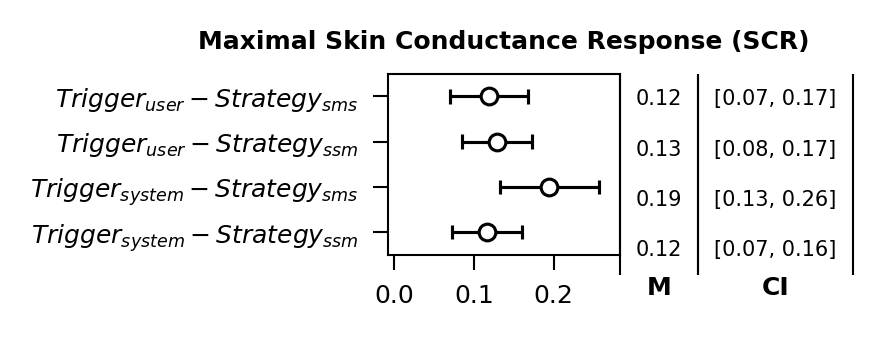

,SYSTEM-SMS,SYSTEM-SSM,USER-SMS,USER-SSM
count,122.000,142.000,140.000,137.000
mean,0.195,0.116,0.119,0.128
cil,0.140,0.080,0.080,0.090
cih,0.260,0.170,0.170,0.170


,Comparison,N,Normality,Test,Statistic,pValue,effectSize
0,SYSTEM-SMS | SYSTEM-SSM | USER-SMS | USER-SSM,144,False,Friedman,13.025,0.005,0.038
1,SYSTEM-SMS|SYSTEM-SSM,144,False,Wilcoxon,2453.000,0.008,0.324
2,SYSTEM-SMS|USER-SMS,144,False,Wilcoxon,2220.000,0.002,0.368
3,SYSTEM-SSM|USER-SSM,144,False,Wilcoxon,4429.000,1.000,-0.035
4,USER-SMS|USER-SSM,144,False,Wilcoxon,3897.000,0.661,-0.138


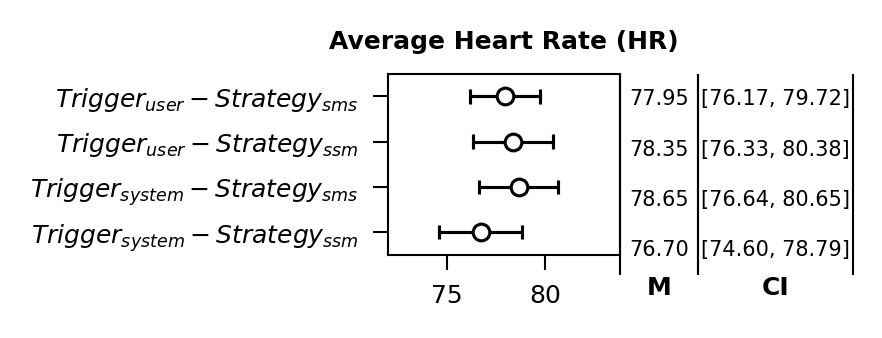

,SYSTEM-SMS,SYSTEM-SSM,USER-SMS,USER-SSM
count,130.000,144.000,144.000,142.000
mean,78.645,76.695,77.947,78.355
cil,76.650,74.540,76.140,76.280
cih,80.620,78.690,79.720,80.420


,Comparison,N,Normality,Test,Statistic,pValue,effectSize
0,SYSTEM-SMS | SYSTEM-SSM | USER-SMS | USER-SSM,144,False,Friedman,3.6,0.308,0.009
1,SYSTEM-SMS|SYSTEM-SSM,144,False,Wilcoxon,3996.0,1.000,0.061
2,SYSTEM-SMS|USER-SMS,144,False,Wilcoxon,4069.0,1.000,-0.044
3,SYSTEM-SSM|USER-SSM,144,False,Wilcoxon,4269.0,0.401,-0.159
4,USER-SMS|USER-SSM,144,False,Wilcoxon,4947.0,1.000,0.026


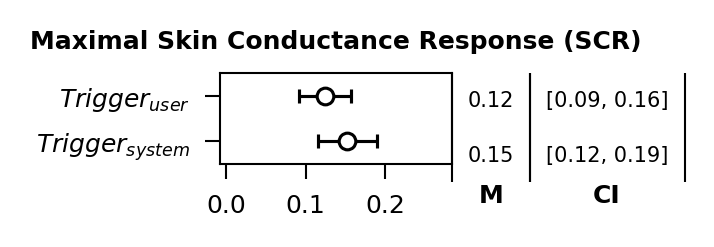

,SYSTEM,USER
count,264.000,277.000
mean,0.152,0.124
cil,0.120,0.090
cih,0.190,0.160


,Comparison,N,Normality,Test,Statistic,pValue,effectSize
0,SYSTEM|USER,286,False,Wilcoxon,13160.0,0.006,0.2


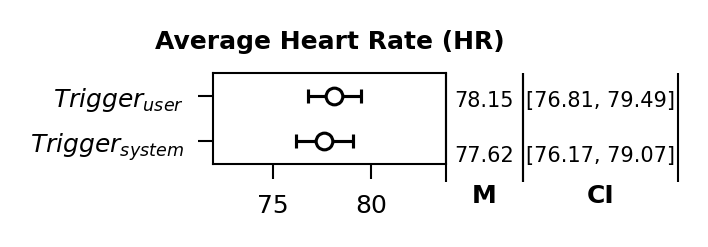

,SYSTEM,USER
count,274.000,286.000
mean,77.621,78.149
cil,76.120,76.830
cih,79.030,79.500


,Comparison,N,Normality,Test,Statistic,pValue,effectSize
0,SYSTEM|USER,286,False,Wilcoxon,16486.0,0.073,-0.125


In [24]:
from cmath import nan
from IPython.display import display, HTML

factor_names_list = [ ['Task', 'Modality'], ['Task']] #
variable_name_list = ['EDA_Response_Max', 'BVP_Rate_Mean']
new_variable_name_list = ['Maximal Skin Conductance Response (SCR)', 'Average Heart Rate (HR)']
filename_body_list = ['Maximal Skin Conductance Response', 'Average Heart Rate']
desc_stats_of_interest = ['count', 'mean', 'cil', 'cih']

values_to_labels_map = {
    'Task':{
        'values':['SYSTEM', 'USER'],
        'labels':['Trigger_{system}', 'Trigger_{user}'],
        },
    'Modality':{
        'values':['SSM', 'SMS'],
        'labels':['Strategy_{ssm}', 'Strategy_{sms}'],
        }
}

def plotQuant(
    df_quant,
    figure_dpi = 300,
    table_head_height = 0.5,
    table_row_height = 1,
    table_head_size = 5,
    table_cell_size = 4,
    factor_columns = [], # factor0
    factor_names = [], # stress
    factor_values_to_labels = [], 
    variable_column = None,
    variable_label = None,
    x_lim = None,
    df_benchmark = None
    ) -> plt.Figure:
     # fetch variable dataframe
    # fetch variable dataframe
    df_variable = df_quant.loc[::, [*factor_columns, variable_column]]
    nb_participants = df_variable.shape[0]
    # compute useful values
    y_min = -0.5
    nb_rows = 1
    for factor_name in factor_names:
        nb_rows *= len(factor_values_to_labels[factor_name]['values'])
    y_max = ( nb_rows - 1) + 0.5

    if x_lim == None:
        var_mean_value = df_variable[variable_column].mean()
        var_std_value = df_variable[variable_column].std()
        sigma_steps = 0.5
        x_min = var_mean_value - sigma_steps * var_std_value
        x_max =var_mean_value + sigma_steps * var_std_value
    else: 
        x_min = x_lim[0]
        x_max = x_lim[1]

    x_range = x_max-x_min
    # create figure
    offset_fraction = 0.53
    axis_label_size = 6
    fig_title_size = 6
    variable_mean_dot_size = 4
    axis_line_width = 0.5
    variable_line_width = 0.75
    variable_dot_width = 4
    fig_legend_size = 4
    variable_ci_vline_offset = 0.16
    # Generate figure
    figure_width = 1 #len(factor_names)
    figure_height = nb_rows/5
    figure_size = (figure_width, figure_height)
    fig = plt.figure(figsize=figure_size, dpi=figure_dpi) 
    ax = plt.axes()
    ax.set_xlim([x_min, x_max])
    ax.set_ylim(y_min, y_max)
    y_ticklabels = []
    table_data = [['M', 'CI']]
    # draw benchmark
    # if df_benchmark is not None:
    #     df_var_bench = df_benchmark.loc[[variable_column], ::]
    #     y = ( len(factor1_columns) * len(factor2_columns) - 1) / 2
    #     x = x_min
    #     color_range = sns.color_palette("RdYlGn", len(df_var_bench.columns.values))
    #     for bench_column, bench_color in zip(df_var_bench.columns.values, color_range):
    #         width = df_var_bench[bench_column].values[0]
    #         height = y_max - y_min
    #         ax.barh(
    #             y= y,
    #             width=width, 
    #             height=height, 
    #             left= x, 
    #             color= bench_color)
    #         x += width

    #     leg = ax.legend(
    #         labels=['%s' % bench_column for bench_column in df_var_bench.columns.values],
    #         loc='center',
    #         frameon=False,
    #         bbox_to_anchor=(0.55, 1.05),
    #         fancybox=False, 
    #         shadow=False, 
    #         fontsize=fig_legend_size, 
    #         #borderpad=0,
    #         labelspacing=0,
    #         columnspacing=0.25,
    #         handlelength=1,
    #         handleheight=1,
    #         ncol=len(df_var_bench.columns.values)
    #     )
    # generate multifactor tree
        # Generate multifactor tree
    root_node = Node("Factor")
    nodes = [root_node]
    def nextNode(parent_node, next_factor_index):
        if next_factor_index < len(factor_names):
            factor_name = factor_names[next_factor_index]
            factor_values = factor_values_to_labels[factor_name]['values']
            for factor_value in factor_values:
                value_node = Node(factor_value, parent=parent_node)
                nextNode(value_node, next_factor_index + 1)
    nextNode(root_node, 0)
        # Iterate over multifactor leafs
    row_index = 0
    for multifactor_node in search.findall(root_node, filter_=lambda node: node.depth == len(factor_names)):
        multifactor_values = []
        for factor_node in multifactor_node.iter_path_reverse():
            multifactor_values.append(factor_node.name)
        multifactor_values.reverse()
        multifactor_values = multifactor_values[1::]
        #display(multifactor_values)
         # fetch Factor x Task
        multifactor_conditions = []
        for multifactor_index, multifactor_value in enumerate(multifactor_values):
            if isinstance(multifactor_value, str):
                multifactor_conditions.append("(df_variable['factor%s'] == '%s')" %(multifactor_index, multifactor_value))
            else:
                multifactor_conditions.append("(df_variable['factor%s'] == %s)" %(multifactor_index, multifactor_value))
        multifactor_conditions = ' & '.join(multifactor_conditions)
        #print(multifactor_conditions)
        df_multifactor = df_variable.loc[pd.eval(multifactor_conditions, target=df_variable), ::]
        variable_clean = df_multifactor.loc[~np.isnan(df_variable[variable_column]), variable_column]
        variable_mean = variable_clean.mean()
        variable_ci = stats.t.interval(alpha=0.95, df=len(variable_clean)-1, loc=np.mean(variable_clean), scale=stats.sem(variable_clean))
        # generate row label
        row_name = []
        for multifactor_index, multifactor_value in enumerate(multifactor_values):
            factor_name = factor_names[multifactor_index]
            factor_map = values_to_labels_map[factor_name]
            factor_value_index = factor_map['values'].index(multifactor_value)
            row_name.append(factor_map['labels'][factor_value_index])
        tick_label = r"${0}$".format('-'.join(row_name))
        y_ticklabels.append(tick_label)
        table_data.append(["%0.2f" %variable_mean, "[%0.2f, %0.2f]" %(variable_ci[0], variable_ci[1])])
        # ax.scatter(
        #     x=df_task_modality[variable_value].values, 
        #     y=[i-0.25 for _ in range(len(df_task_modality[variable_value].values))],
        #     c=[0.5,0.5,0.5],
        #     s=1
        # )
        ax.plot(variable_mean, row_index, 'o', markersize=variable_dot_width, markerfacecolor='white', markeredgecolor='black', markeredgewidth=variable_line_width) 
        ax.hlines(row_index, variable_ci[0], variable_ci[1], colors='black', linestyles='solid', linewidth=variable_line_width)
        ax.vlines(variable_ci[0], row_index-variable_ci_vline_offset, row_index+variable_ci_vline_offset, colors='black', linestyles='solid', linewidth=variable_line_width)
        ax.vlines(variable_ci[1], row_index-variable_ci_vline_offset, row_index+variable_ci_vline_offset, colors='black', linestyles='solid', linewidth=variable_line_width)

        row_index += 1
        # ax.text(
        #     x = x_min - offset_fraction * x_range, 
        #     y = (len(factor2_labels) - 1)/2 + task_index * len(factor2_labels),
        #     ha = 'center',
        #     va = 'center',
        #     #c = '#7e7e7e',
        #     fontsize=axis_label_size,
        #     s = r"${0}$".format(factor1_labels[task_index])
        # )
    ax.set_yticks(range(len(y_ticklabels)))  
    ax.set_yticklabels(y_ticklabels)
    plt.title(variable_label, fontsize=fig_title_size, fontweight='bold')
    ax.tick_params(axis='y', labelsize=axis_label_size)
    ax.tick_params(axis='x', labelsize=axis_label_size)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
        # change axes and ticks width
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axis_line_width)
    ax.xaxis.set_tick_params(width=axis_line_width)
    ax.yaxis.set_tick_params(width=axis_line_width)
    # draw table
    axes_table = tab.Table(
        ax,
        bbox = [1.00, -1.0/nb_rows, 1, 1.0 + 1.0/nb_rows] 
        #loc=trans.Bbox([[0, 1], [1, 7]]) #trans.Bbox.from_extents(x_max, y_max, 3, 7)
        )
        
    axes_table.auto_set_font_size(False)
    visible_edges_value = "open"
    nb_row = len(table_data)
    nb_col = len(table_data[0])
    for row_index, row_values in enumerate(table_data):
            for col_index, col_value in enumerate(row_values):
                col_width = len(table_data[0][col_index])  # 0.5 if col_index == 0 else 1
                if row_index == 0:
                        cell = axes_table.add_cell(
                            row= (nb_row - 1) - row_index,
                            col= col_index, 
                            width=col_width,
                            height=table_head_height,
                            edgecolor='k',
                            facecolor='w',
                            fill=False,
                            text=col_value,
                            loc='center',
                            fontproperties=FontProperties(size=table_head_size, weight='bold')
                        )
                        cell.visible_edges = "open"
                        cell.set(linewidth=axis_line_width)
                else:
                    cell = axes_table.add_cell(
                            row= (nb_row - 1) - row_index,
                            col=col_index, 
                            width=col_width,
                            height=table_row_height,
                            edgecolor='k',
                            facecolor='w',
                            fill=False,
                            text=col_value,
                            loc='center',
                            fontproperties=FontProperties(size=table_cell_size)
                        )
                    cell.visible_edges = "LR"
                    cell.set(linewidth=axis_line_width)
    ax.add_table(axes_table)
    plt.show()
    return fig


for factor_names in factor_names_list:
    for variable_index, variable_name in enumerate(variable_name_list):
        # generate a title
        variable_title = '[%s] %s' %(' x '.join(factor_names), new_variable_name_list[variable_index])
        title(variable_title)
        # fetch useful information
        new_variable_name = new_variable_name_list[variable_index]
        # scoping of global dataframe
        df_var = df_quant.loc[::,factor_names + [variable_name]].reset_index()
        # renaming columns 
        df_var_columns = {}
        for factor_index, factor_name in enumerate(factor_names):
            df_var_columns[factor_name] = "factor%s" % factor_index
        df_var_columns[variable_name] = "variable"
        df_var.rename(columns=df_var_columns, inplace=True)
        factor_columns = [factor_column for factor_column in df_var.columns.values if "factor" in factor_column]
        fig_demography = plotQuant(
                    df_var,
                    figure_dpi = 300,
                    table_head_height = 0.5,
                    table_row_height = 1,
                    table_head_size = 6,
                    table_cell_size = 5,
                    factor_columns = factor_columns,
                    factor_names = factor_names,
                    factor_values_to_labels = values_to_labels_map,
                    variable_column = 'variable',
                    variable_label = new_variable_name_list[variable_index],
                    x_lim = None,
                    df_benchmark = None
                    )
        # Pivot factor x variables
        df_var_cpy = df_var.copy()
        df_var_cpy["factor"] = df_var_cpy[factor_columns].astype(str).apply("-".join, axis=1)
        df_var_cpy.drop(columns=factor_columns, inplace=True)
        #display(df_var_cpy)
        multifactor_values = df_var_cpy["factor"].unique().tolist()

        # df_var_pivot = df_var_cpy.pivot(index="index", columns="factor", values="variable")
        # # check for nan values
        # has_nan_values = False
        # for row_values in df_var_pivot.to_records():
        #     for row_value in row_values:
        #         if math.isnan(row_value):
        #             has_nan_values = True
        #             break
        # # replace nan values by zeros
        # if has_nan_values:        
        #     warn("Replacing NaN values by zeros.")
        #     df_var_pivot.fillna(0, inplace=True)
        # # from pivot to normal
        # df_var_pivot = pd.DataFrame(df_var_pivot.to_records()).set_index('index')

        #display(df_var_pivot)
        df_var_pivot = pd.DataFrame()
        for multifactor_value in multifactor_values:
            raw_values = df_var_cpy.loc[df_var_cpy['factor'] == multifactor_value, 'variable'].values
            df_var_col = pd.DataFrame({multifactor_value:raw_values})
            df_var_pivot = pd.concat([df_var_pivot,df_var_col],  axis=1)
        # display(df_var_pivot) 
        # descriptive statistics
        df_stats_desc = statistics.Statistics.describePlus(df_var_pivot).round(3)
        display(df_stats_desc.loc[desc_stats_of_interest, :])
        df_stats_infer = statistics.Statistics.inferQuantPaired(df_var_pivot).round(3)
        display(df_stats_infer)

